In [ ]:
from pandas import *
import seaborn as sb

In [ ]:
df = read_csv("StudentsPerformance.csv")

In [ ]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<Axes: ylabel='proportion'>

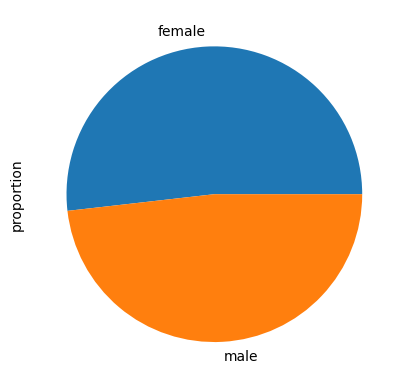

In [ ]:
df["gender"].value_counts(normalize=True).plot.pie()

<Axes: ylabel='proportion'>

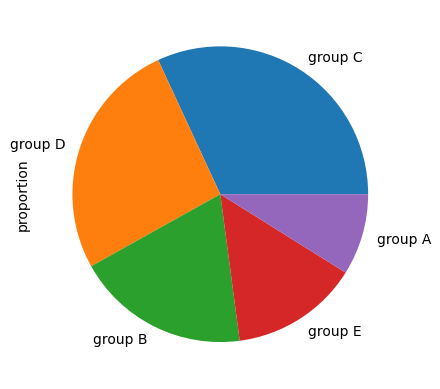

In [ ]:
df['race/ethnicity'].value_counts(normalize=True).plot.pie()

<Axes: ylabel='count'>

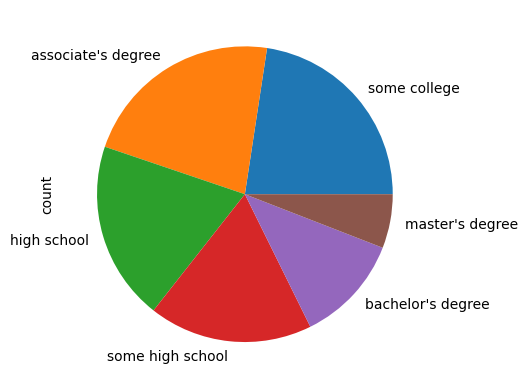

In [ ]:
df['parental level of education'].value_counts().plot.pie()

In [ ]:
#calculating mean of the missing values in selected column
df['lunch'].isna().mean()

np.float64(0.0)

In [ ]:
#check how many times a unique value appears on the column
df['test preparation course'].value_counts()

,count
test preparation course,
none,642
completed,358


In [ ]:
#Statistical summary of this column
df['math score'].describe()

,math score
count,1000.00000
mean,66.08900
std,15.16308
min,0.00000
25%,57.00000
50%,66.00000
75%,77.00000
max,100.00000


<Axes: ylabel='Frequency'>

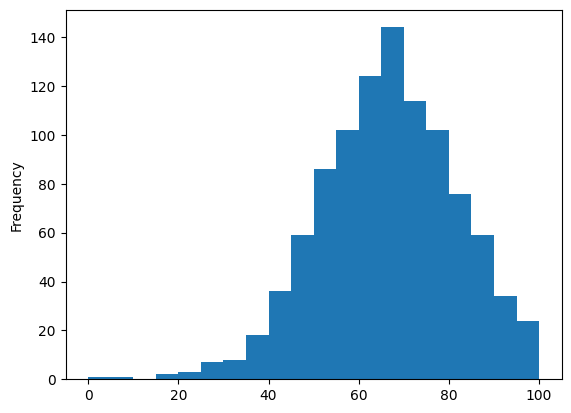

In [ ]:
#creating a histogram
df['math score'].plot.hist(bins=20)

<Axes: ylabel='Density'>

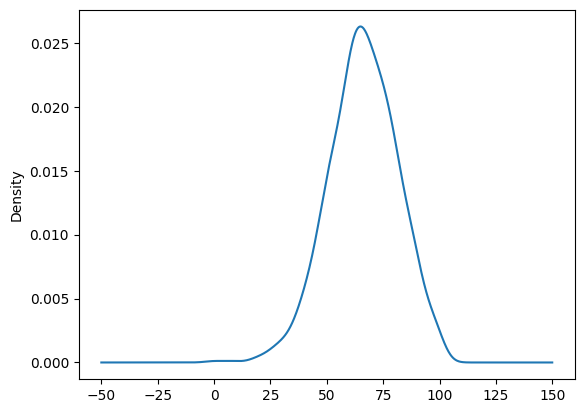

In [ ]:
#creating a smother version of the histogram
df['math score'].plot.density()

<Axes: xlabel='writing score', ylabel='math score'>

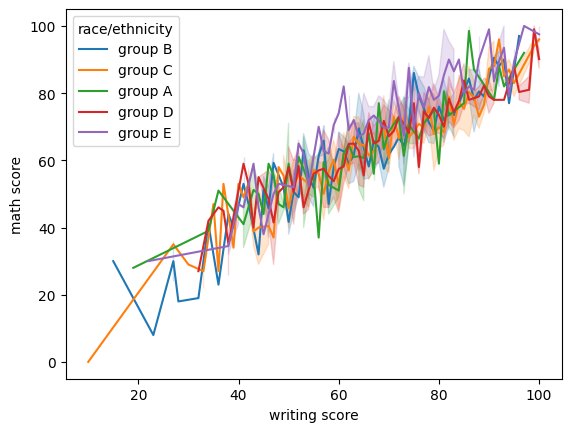

In [ ]:
sb.lineplot(data=df, x='writing score', y='math score', hue= 'race/ethnicity')

Exercise
Step 1: Load your data and prepare it for analysis

Upload data about catering establishments in the USA.

Check the correctness of the installed data types.

Check for missing values and duplicates.

Step 2: Exploratory data analysis

Explore the ratio of types of public catering facilities by quantity. Build a graph.

Explore the ratio of chain and non-chain establishments by quantity. Build a graph.

Determine what type of public catering facility is characterized by network distribution.

What is typical for chain establishments: many establishments with a small number of seats in each or few establishments with a large number of seats?

For each type of public catering facility, find the average number of seats. Which type provides, on average, the largest number of seats? Build graphs.

Build a graph of the top 10 streets by the number of public catering facilities.

Select street information from the address column into a separate column** .

In [ ]:
import pandas as pd
from pandas import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = read_csv('restaurants.csv')
data

,ID,Name,Chain,Type,Address,Number of Seats
0,1,The Cedar Delight,Yes,Bar,"New York, Elm, 528",85
1,2,Red Lincoln Bar,Yes,Bistro,"Chicago, Park, 109",94
2,3,Daily Washington Cafe,No,Cafe,"Los Angeles, Pine, 431",62
3,4,The Park Bakery,Yes,Grill,"Los Angeles, Lincoln, 962",50
4,5,Blue Park Bakery,Yes,Grill,"Houston, Pine, 592",29
...,...,...,...,...,...,...
95,96,Red Washington House,No,Grill,"New York, Lincoln, 194",81
96,97,Red Sunset Bistro,No,Grill,"Houston, Main, 850",95
97,98,Green Park Grill,Yes,Cafe,"Chicago, Washington, 7",69
98,99,Red Maple House,No,Bistro,"Los Angeles, Main, 970",40


In [ ]:
#Check the data types
print('Data Types:\n', data.dtypes)


Data Types:
 ID                  int64
Name               object
Chain              object
Type               object
Address            object
Number of Seats     int64
dtype: object


In [ ]:
#Check for missing values
print('Missing is:\n', data.isnull().sum())

Missing is:
 ID                 0
Name               0
Chain              0
Type               0
Address            0
Number of Seats    0
dtype: int64


In [ ]:
#Check for duplicates
print('\nNumber of Duplicates:', data.duplicated().sum())


Number of Duplicates: 0


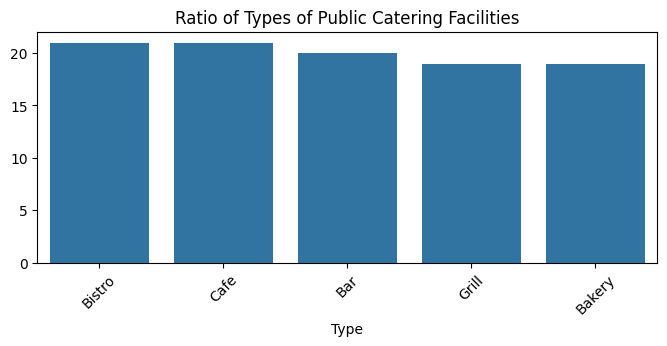

In [ ]:
#Step 2
#Ratio of types of public catering facilities
type_counts = data['Type'].value_counts()
plt.figure(figsize =(8,3))
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.xticks(rotation=45)
plt.title('Ratio of Types of Public Catering Facilities')
plt.show()

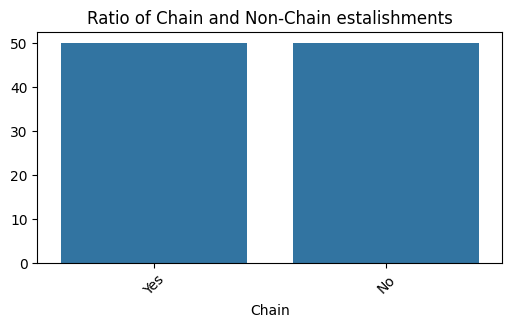

In [ ]:
chain_counts = data['Chain'].value_counts()
plt.figure(figsize = (6,3))
sns.barplot(x=chain_counts.index, y=chain_counts.values)
plt.xticks(rotation=45)
plt.title('Ratio of Chain and Non-Chain estalishments')
plt.show()

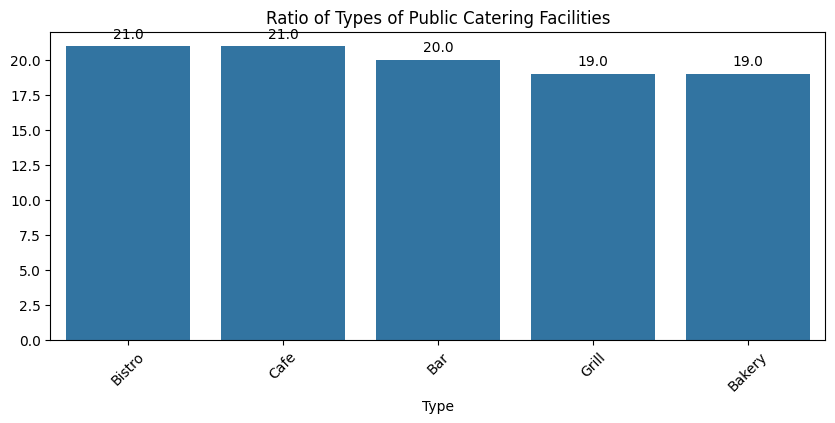

In [ ]:
#how to value the data for each bar

import seaborn as sns
import matplotlib.pyplot as plt
type_counts = data['Type'].value_counts()
plt.figure(figsize = (10, 4))
barplot = sns.barplot(x = type_counts.index, y=type_counts.values)
#Adding data inside the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')
plt.xticks(rotation=45)
plt.title('Ratio of Types of Public Catering Facilities')
plt.show()

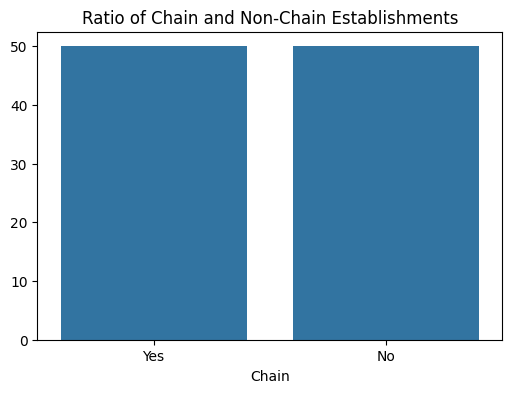

In [ ]:
# 2.2 Ratio of chain and non-chain establishments
chain_counts = data['Chain']. value_counts()
plt.figure(figsize = (6,4))
sns.barplot(x=chain_counts.index,  y=chain_counts.values)
plt.title('Ratio of Chain and Non-Chain Establishments')
plt.show()

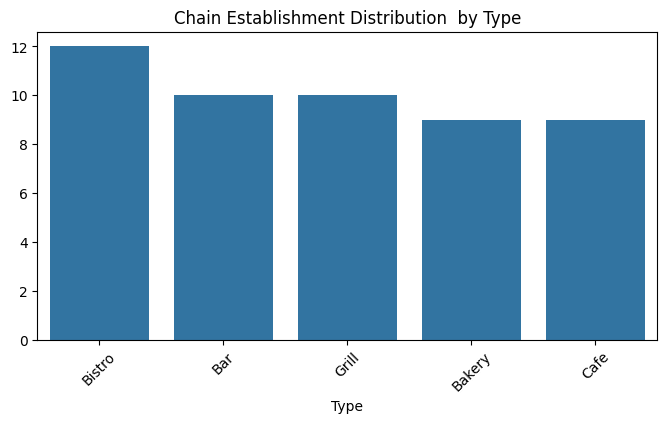

In [ ]:
#2.3 Type of public catering facility characterized by network distribution
chain_distribution = data[data['Chain'] == 'Yes']['Type'].value_counts()
plt.figure(figsize = (8,4))
sns.barplot(x=chain_distribution.index, y=chain_distribution.values)
plt.xticks(rotation=45)
plt.title('Chain Establishment Distribution  by Type')
plt.show()

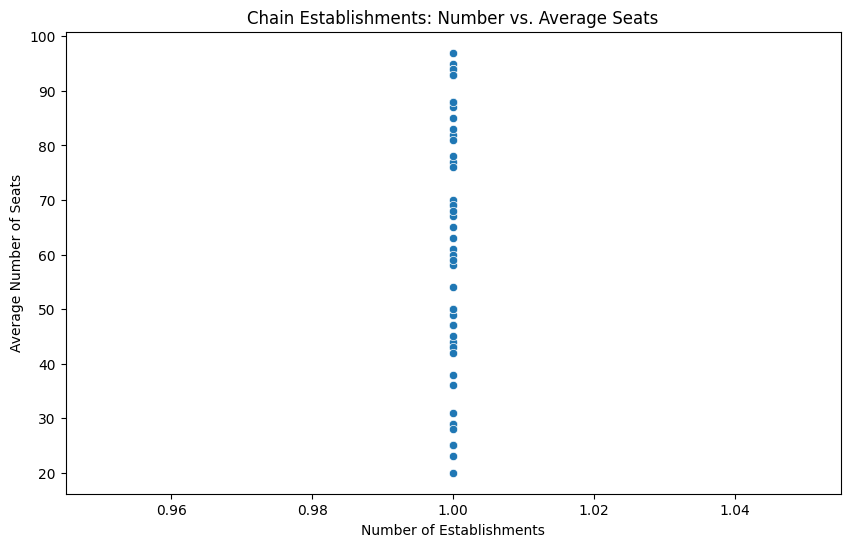

In [ ]:
#2.3 Characteristics of chain establishments
chain_data =data [data['Chain'] == 'Yes']
chain_summary = chain_data.groupby('Name').agg({'ID' : 'count', 'Number of Seats' : 'mean'})
plt.figure(figsize = (10,6))
sns.scatterplot (x=chain_summary['ID'], y=chain_summary['Number of Seats'])
plt.xlabel ('Number of Establishments')
plt.ylabel ('Average Number of Seats')
plt.title('Chain Establishments: Number vs. Average Seats')
plt.show()

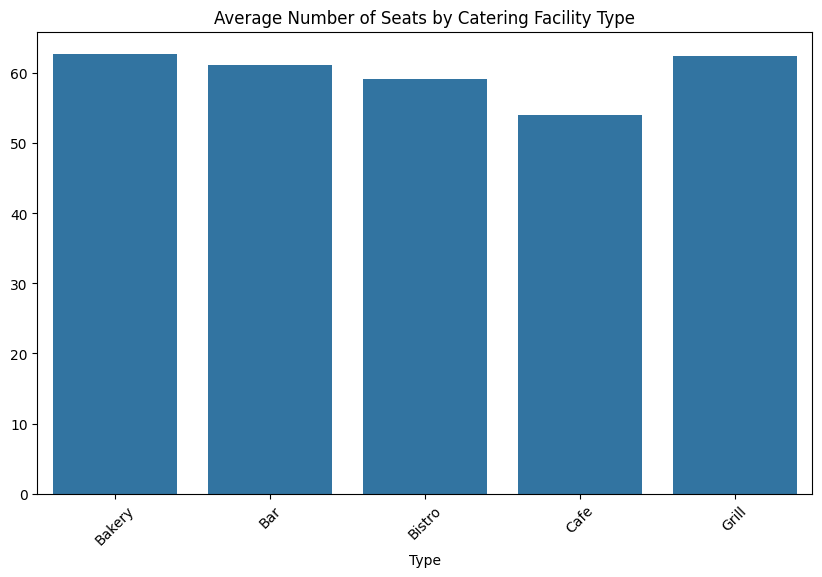

In [ ]:
#2.5 Average number of seats for each type of public catering facility
avg_seats = data.groupby('Type')['Number of Seats'].mean()
plt.figure(figsize=(10,6))
sns.barplot(x=avg_seats.index, y=avg_seats.values)
plt.xticks(rotation=45)
plt.title('Average Number of Seats by Catering Facility Type')
plt.show()

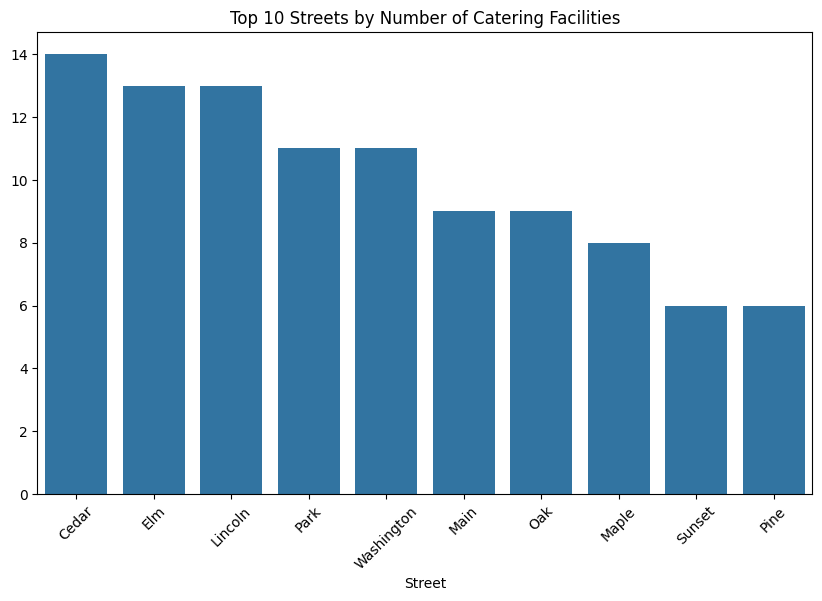

In [ ]:
#2.6 Extract street information and analyze
data['Street'] = data['Address'].apply(lambda x: x.split(',')[1].strip())
top_secrets = data['Street'].value_counts().head(10)
plt.figure(figsize = (10,6))
sns.barplot(x=top_secrets.index, y=top_secrets.values)
plt.xticks(rotation=45)
plt.title('Top 10 Streets by Number of Catering Facilities')
plt.show()